我们来考虑一种基于分类概率导出的描述分布的方法，这从我们开始的类似SVM的概率设定中可以看出端详。

即这样设定概率，我们首先讨论给定双方数据后，对一个点的分类概率。这个分类的意义我们看成这个点被那方控制，那么分类概率比较相近/焦灼
的点被看成发生战役概率较大。从而每一种给出分类概率的分类算法均可以导出某种战役发生地点概率分布。

正如sklearn所展示的分类概率图一样
http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
<img src="sphx_glr_plot_classifier_comparison_001.png">

In [1]:
import sklearn

Automatically created module for IPython interactive environment


D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


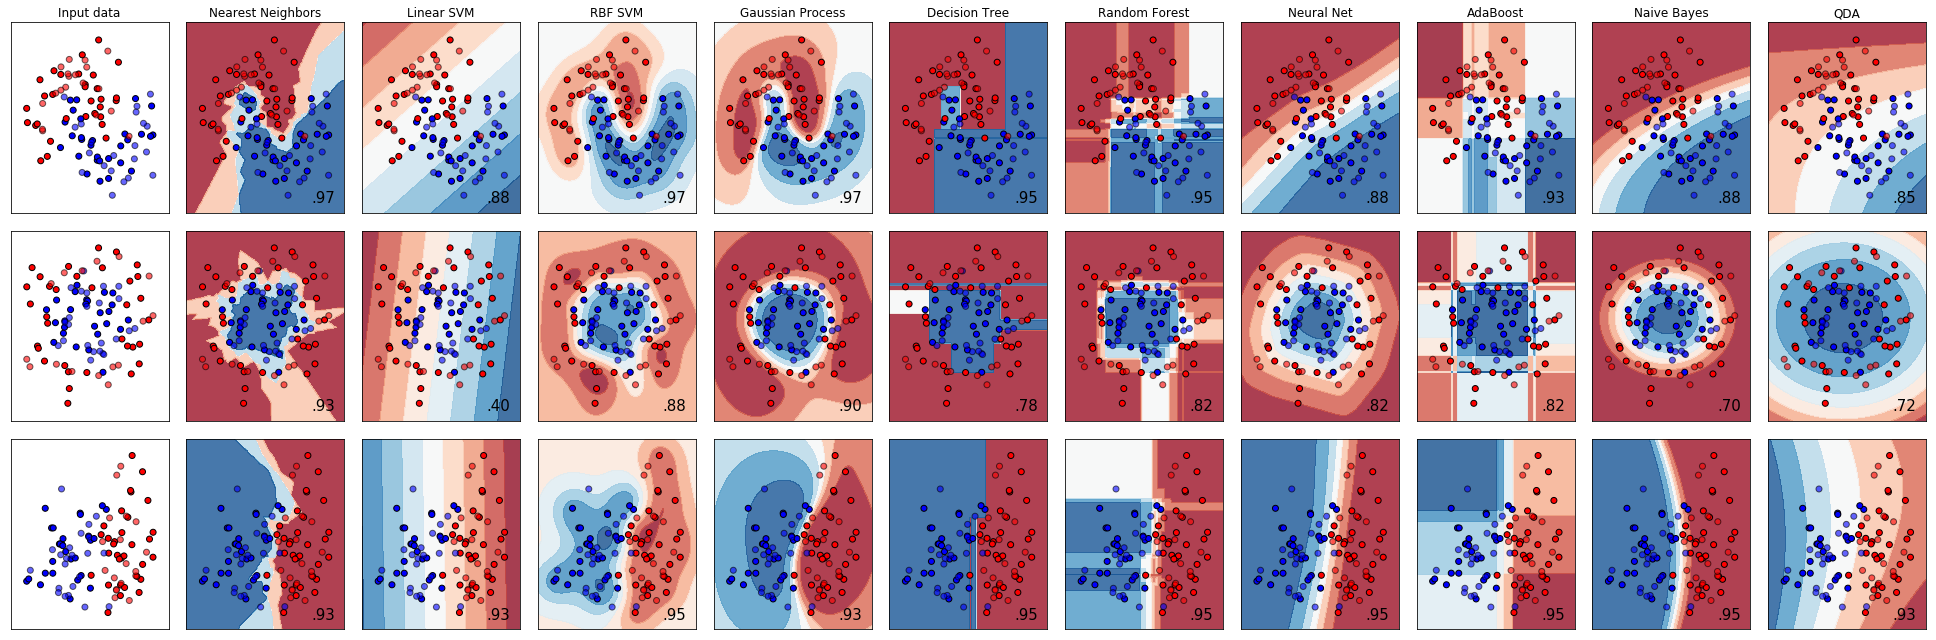

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


In [5]:
GaussianNB?

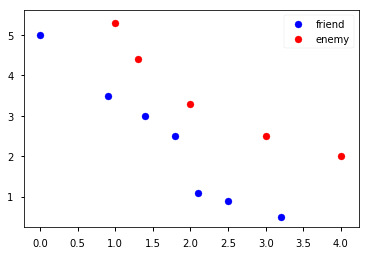

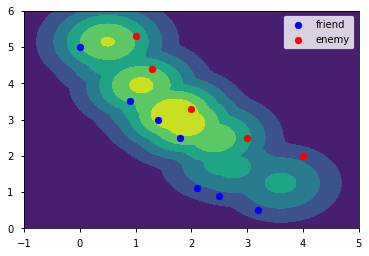

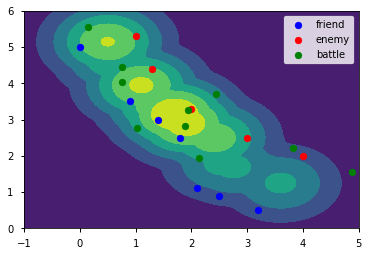

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_context('notebook')
import scipy.stats as stats

np.random.seed(23)
friendly_point = np.array([[0.0,5],[0.9,3.5],[1.4,3.0],[1.8,2.5],[2.1,1.1],[2.5,0.9],[3.2,0.5]])
enemy_point = np.array([[1.0,5.3],[1.3,4.4],[2.0,3.3],[3.0,2.5],[4.0,2.0]])

plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.legend()
plt.show()

_x = np.linspace(-1,5,100)
_y = np.linspace(0,6,100)
x,y = np.meshgrid(_x,_y)
x = x.flatten()
y = y.flatten()

friendly_chance = np.min((np.subtract.outer(x,friendly_point[:,0])**2 + np.subtract.outer(y,friendly_point[:,1])**2),axis=1)
enemy_chance = np.min((np.subtract.outer(x,enemy_point[:,0])**2 + np.subtract.outer(y,enemy_point[:,1])**2),axis=1)
chance = np.exp(-0.5*(friendly_chance+enemy_chance))

plt.contourf(_x,_y,chance.reshape([_x.shape[0],_y.shape[0]]))
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.legend()
plt.show()

prob = chance / chance.sum()
xy = np.array([x,y]).transpose()
battle = xy[np.random.choice(len(xy),10,p=prob)]

x_step = _x[1] - _x[0]
y_step = _y[1] - _y[0]

x_noise = stats.uniform(-x_step/2,x_step/2).rvs(10)
y_noise = stats.uniform(-y_step/2,x_step/2).rvs(10)

battle_x = battle[:,0] + x_noise
battle_y = battle[:,1] + y_noise

plt.contourf(_x,_y,chance.reshape([_x.shape[0],_y.shape[0]]))
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.legend()
plt.show()

data = dict(
    N_friendly = len(friendly_point),
    friendly = friendly_point,
    N_enemy = len(enemy_point),
    #enemy = enemy_point,
    N_battle = len(battle),
    battle = np.array([battle_x,battle_y]).T
)

init = dict(
    enemy = enemy_point
)

init_f = lambda :init

In [9]:
np.vstack([enemy_point,friendly_point])

array([[1. , 5.3],
       [1.3, 4.4],
       [2. , 3.3],
       [3. , 2.5],
       [4. , 2. ],
       [0. , 5. ],
       [0.9, 3.5],
       [1.4, 3. ],
       [1.8, 2.5],
       [2.1, 1.1],
       [2.5, 0.9],
       [3.2, 0.5]])

In [27]:
friendly_point

array([[0. , 5. ],
       [0.9, 3.5],
       [1.4, 3. ],
       [1.8, 2.5],
       [2.1, 1.1],
       [2.5, 0.9],
       [3.2, 0.5]])

In [28]:
enemy_point

array([[1. , 5.3],
       [1.3, 4.4],
       [2. , 3.3],
       [3. , 2.5],
       [4. , 2. ]])

In [29]:
X

array([[0. , 5. ],
       [0.9, 3.5],
       [1.4, 3. ],
       [1.8, 2.5],
       [2.1, 1.1],
       [2.5, 0.9],
       [3.2, 0.5],
       [1. , 5.3],
       [1.3, 4.4],
       [2. , 3.3],
       [3. , 2.5],
       [4. , 2. ]])

In [30]:
Y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [31]:
X = np.vstack([friendly_point,enemy_point])
Y = np.ones(len(enemy_point)+len(friendly_point),dtype=int)
Y[:len(friendly_point)] = 0

In [33]:
X

array([[0. , 5. ],
       [0.9, 3.5],
       [1.4, 3. ],
       [1.8, 2.5],
       [2.1, 1.1],
       [2.5, 0.9],
       [3.2, 0.5],
       [1. , 5.3],
       [1.3, 4.4],
       [2. , 3.3],
       [3. , 2.5],
       [4. , 2. ]])

In [34]:
Y

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [35]:
clf = GaussianNB().fit(X,Y)

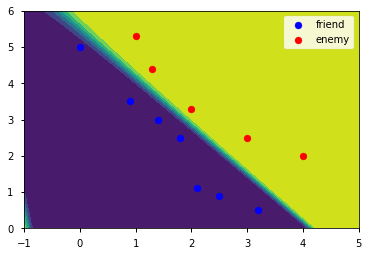

In [40]:
xx,yy = np.meshgrid(_x,_y)
zz = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1].reshape(xx.shape)
plt.contourf(xx,yy,zz)
plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
#plt.scatter(battle_x,battle_y,color='green',label='battle')
plt.legend()
plt.show()


In [64]:
import scipy
min_dis = scipy.spatial.distance.cdist(np.c_[xx.ravel(),yy.ravel()], X).min(axis=1).reshape(xx.shape)
dis_factor = np.exp(-0.1*min_dis)

In [67]:
def plot_prob(X,Y,xx,yy,skip_no_prob=True, dis_factor=None, classify_prob_map = None):
    for name, clf in zip(names, classifiers):

        #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X, Y)
        #score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        #'''
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            if skip_no_prob:
                continue
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        #'''
        #Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        if classify_prob_map is not None:
            #Z = Z * (1-Z) #* dis_factor
            Z = classify_prob_map(Z)
        if dis_factor is not None:
            Z *= dis_factor
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        plt.scatter(friendly_point[:,0],friendly_point[:,1],color='blue',label='friend')
        plt.scatter(enemy_point[:,0],enemy_point[:,1],color='red',label='enemy')
        #plt.scatter(battle_x,battle_y,color='green',label='battle')
        plt.title(name)
        plt.legend()
        plt.show()

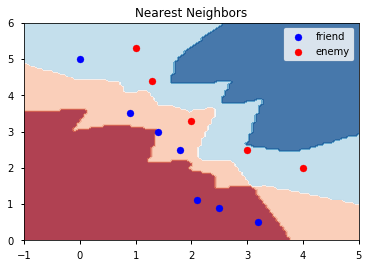

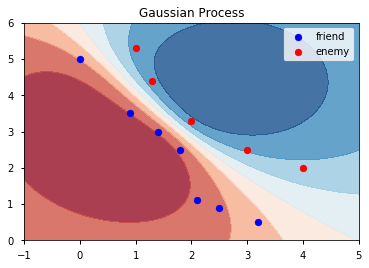

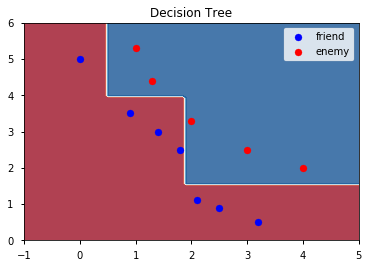

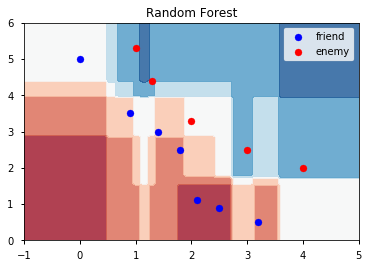

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


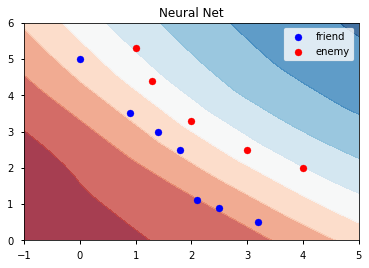

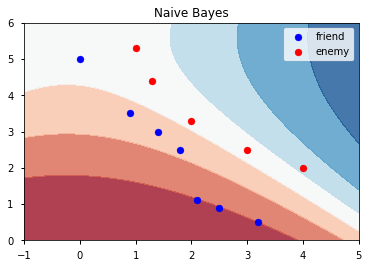

In [62]:
plot_prob(X,Y,xx,yy)

于是我们发现一个很明显的问题，这种有扩大型白带的意味着在那些单位稀疏的地方会享有和单位密集的地方一样的概率。而那种发散性白带更意味着
它们把本来应该在密集地区但面积少的战役发生机会吸掉了。所以我们加个修正，这个概率本身取$\min(p,(1-p))$的最小值或$p*(1-p)$来归结这个信息，
外面根据一个距离最近单位计算一个概率，两者相乘处理。

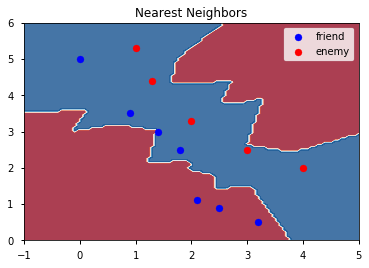

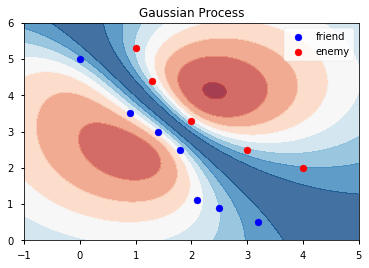

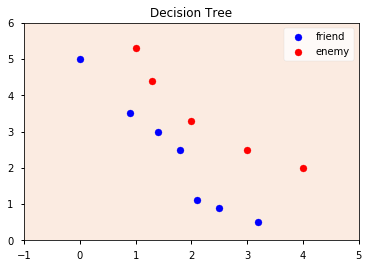

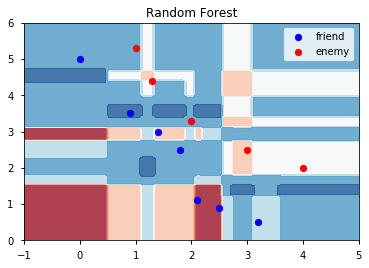

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


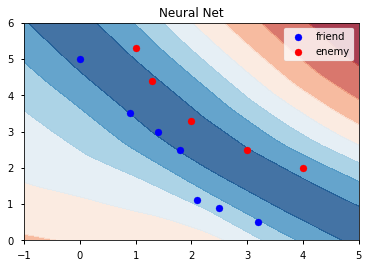

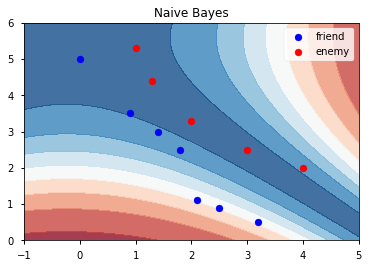

In [61]:
plot_prob(X,Y,xx,yy,classify_prob_map = lambda Z: Z*(1-Z))

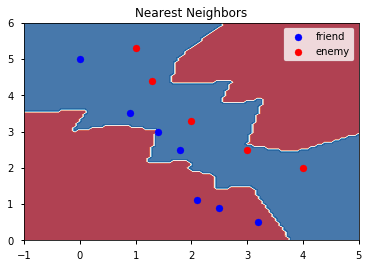

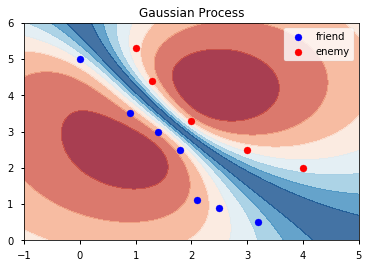

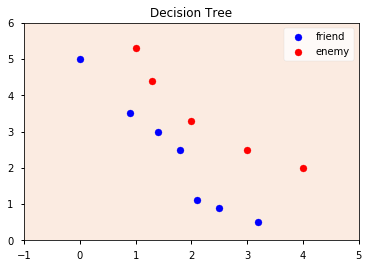

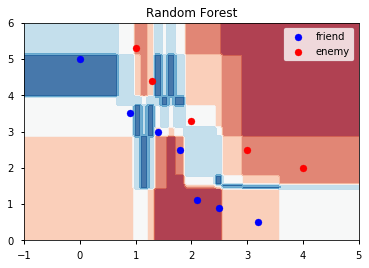

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


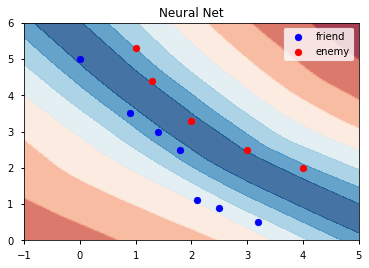

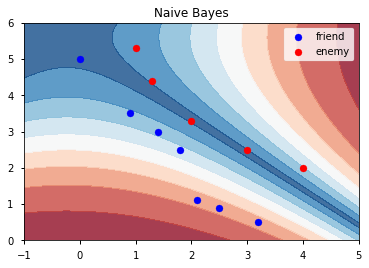

In [65]:
plot_prob(X,Y,xx,yy,classify_prob_map = lambda Z: np.min([Z,1-Z],axis=0))

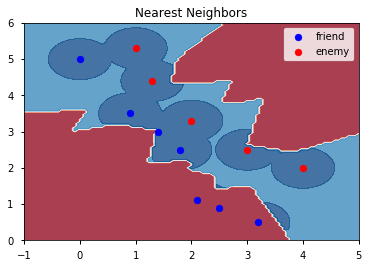

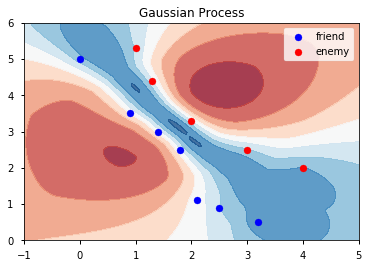

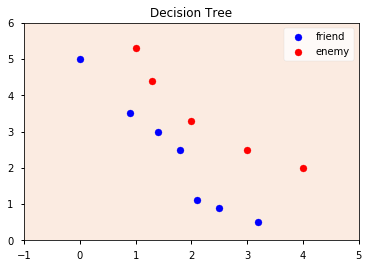

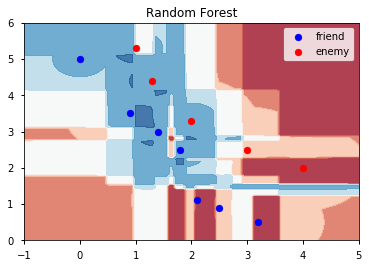

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


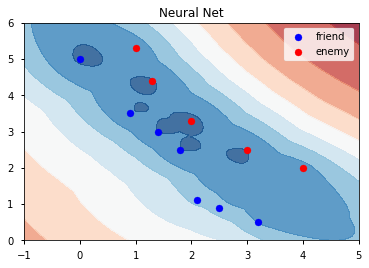

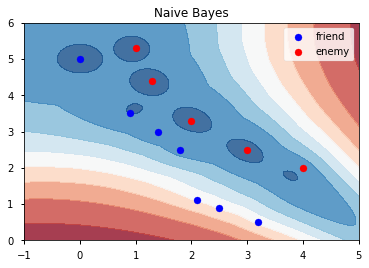

In [69]:
plot_prob(X,Y,xx,yy,classify_prob_map = lambda Z: Z*(1-Z),dis_factor=0.1*dis_factor)

In [79]:
__x = np.linspace(-5,10,200)
__y = np.linspace(-5,10,200)
xxx,yyy = np.meshgrid(__x,__y)

_min_dis = scipy.spatial.distance.cdist(np.c_[xxx.ravel(),yyy.ravel()], X).min(axis=1).reshape(xxx.shape)
_dis_factor = np.exp(-_min_dis)

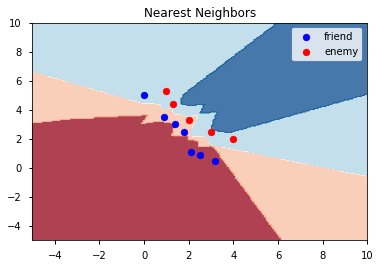

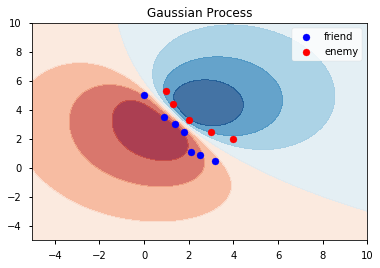

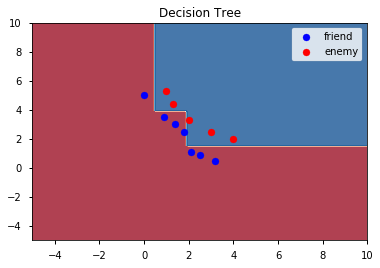

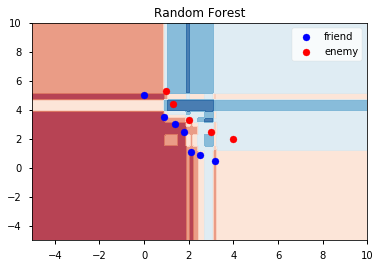

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


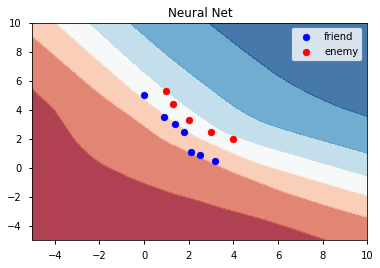

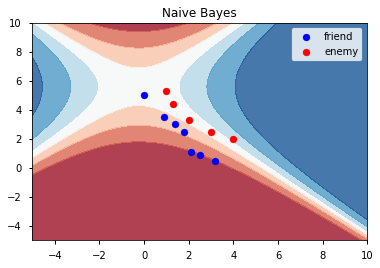

In [82]:
plot_prob(X,Y,xxx,yyy)

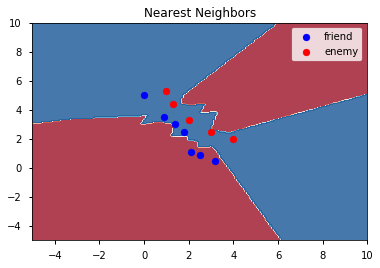

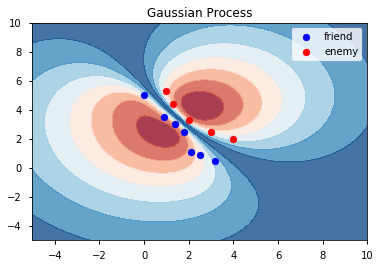

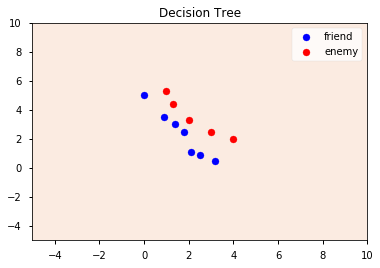

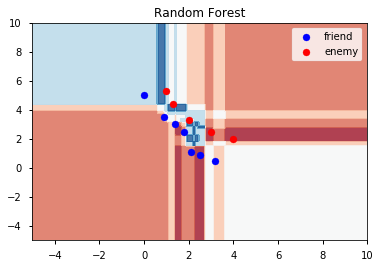

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


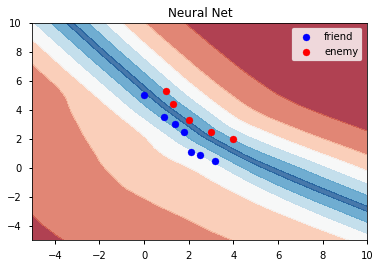

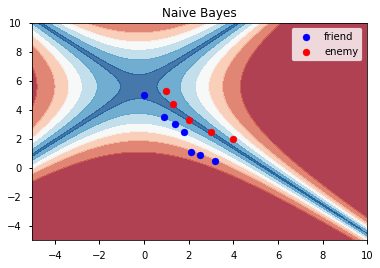

In [71]:
plot_prob(X,Y,xxx,yyy,classify_prob_map = lambda Z: np.min([Z,1-Z],axis=0))

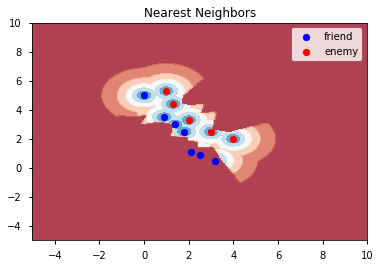

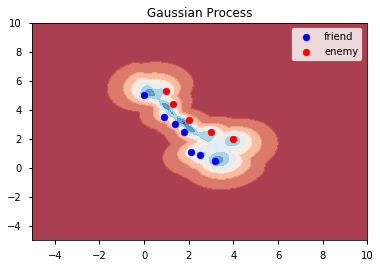

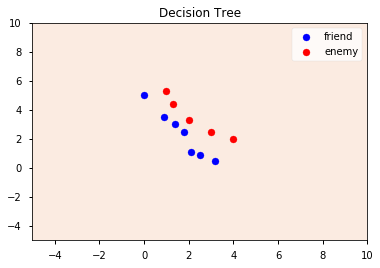

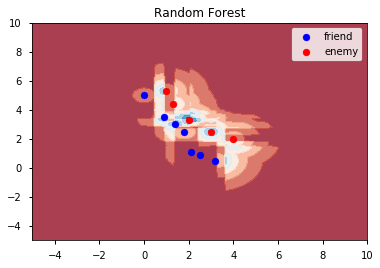

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


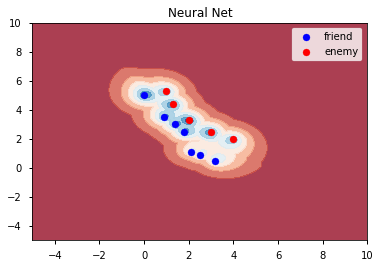

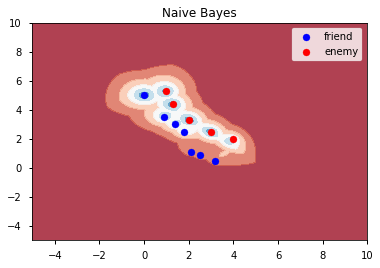

In [80]:
plot_prob(X,Y,xxx,yyy,classify_prob_map = lambda Z: np.min([Z,1-Z],axis=0),dis_factor=_dis_factor)

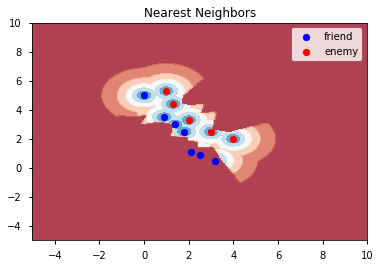

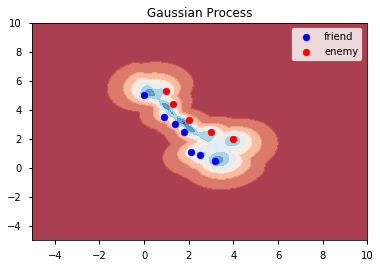

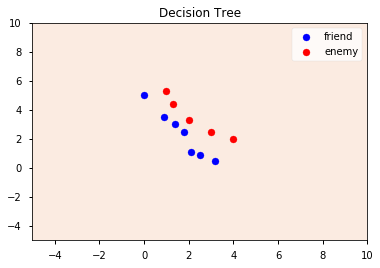

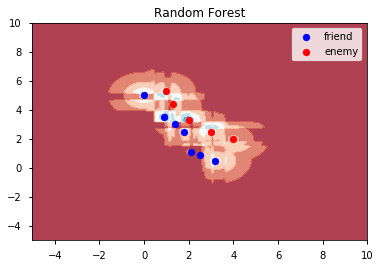

D:\anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


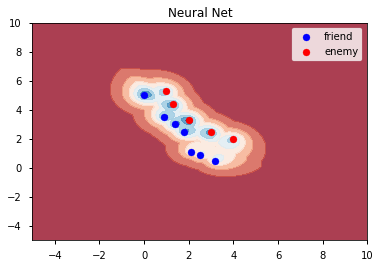

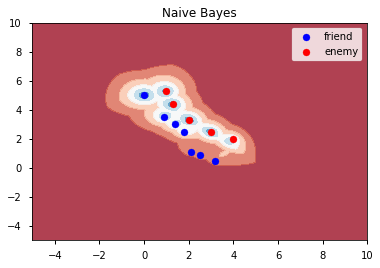

In [81]:
plot_prob(X,Y,xxx,yyy,classify_prob_map = lambda Z: np.min([Z,1-Z],axis=0),dis_factor=0.1*_dis_factor)

这个看起来工作的不错，